# LINEAR REGRESSION

In this notebook we are going to explain the principal characterisitcs of linear regression.

First of all, linear regression is an algoritm used in machine learning. Specifically, it follows inside the "supervised learning". 

# Database and language

For this notebook we are going to use the database "red wine quiality". You can follow the entery description follow this link https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009.

* All the variable in this database are quantitative.
* The target variable is "quiality". This variable range between 0 and 10.

The code of the following lines is developed with python.

We are going to import the libraries required to all the futures steps.

In [1]:
import pandas as pd                                  # Read csv
from sklearn.linear_model  import LinearRegression
from sklearn.preprocessing import PolynomialFeatures # interaction effect, no linear models
from sklearn.linear_model  import Ridge, RidgeCV, Lasso, LassoCV # regularizationy, best value of alpha Ridge, reduce features, best value of alpha Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler # standardization
import matplotlib.pyplot as plt                  # plot
import numpy as np
import statsmodels.api as sm



Now, we are going to upload the data. As we can see, there are 12 variables: 11 features and 1 target. There are 1,599 rows

In [2]:
# read csv
df = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
print("Number of rows:", len(df))
print(df.head())

Number of rows: 1599
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  

 Now we are going to split the data into training and test. 
 
 df_train. Has 

In [3]:
# Split data into two df one with 80% of data and other with 20%
df_train = df.sample(frac=0.8, random_state=200)
df_train_target = df_train['quality']
df_train_features = df_train.drop('quality', axis=1)

df_test = df.drop(df_train.index)

print("df_train has", len(df_train), "cases and", df_train.shape[1], "columns")
print("df_train_target has", len(df_train_target), "cases and only has one columns (target)")
print("df_train_features has", len(df_train_features), df_train_features.shape[1], "columns that are equal to the number of features")

print("df_test has", len(df_test), "cases and", df_test.shape[1], "columns")

print("If we add the number of cases in train,", len(df_train), ",plus the number of cases in test,", len(df_test), ", we obtain the total len of the original data", len(df_train) + len(df_test))

df_train has 1279 cases and 12 columns
df_train_target has 1279 cases and only has one columns (target)
df_train_features has 1279 11 columns that are equal to the number of features
df_test has 320 cases and 12 columns
If we add the number of cases in train, 1279 ,plus the number of cases in test, 320 , we obtain the total len of the original data 1599


# 1. Introduction

The aim of linear regression algorithm is to predict one variable (VD, also know as target) using one or more features (VI).

There are two type of models depending on the number of features involve:

* Simple Linear Regression. Only one Feature is used to predict the target:

$$
\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1 + \epsilon
$$

* Multiple Linear Regression. Two or more features are used to predict the target.

$$
\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1 +  \hat{\beta}_2 x_2 + ... + \hat{\beta}_n x_n + \epsilon
$$

Where:

* $ \hat{y} $: Is the target we predict.
* $ \hat{\beta}_0 $: Is the intercept or bias.
* $ \hat{\beta}_1, \hat{\beta}_2, ... $: Are the coefficients (weights, effect) associated with each feature. Is the effect of one feature in the target.
* $ \epsilon $: Is the error

We assume that the relation between VD and the VI is linear.

### A. Compute our first simple linear regression model

We are going to use trainig data. As we said, our target variable is "quality" (stored in df_train_target). To predict the value we are going to use as feature "alcohol" (stored in df_train_features with the other features).

In [4]:
# Select only the feature alcohol
df_train_feature_alcohol = df_train[['alcohol']]

# Print results
print("Target quality \n", df_train_target.sort_index().head(10), "\n")
print("Feature alcohol \n", df_train_feature_alcohol.sort_index().head(10))

Target quality 
 1     5
2     5
3     6
4     5
5     5
6     5
7     7
8     7
9     5
11    5
Name: quality, dtype: int64 

Feature alcohol 
     alcohol
1       9.8
2       9.8
3       9.8
4       9.4
5       9.4
6       9.4
7      10.0
8       9.5
9      10.5
11     10.5


Now we create the model that put in relation quality and alcohol. Steps:

* Create the model.
* Fit the model We obtain the coefficients and the intercept here.
* Show the values for intercept and coefficients

In [5]:
# Create SLRM and fit it
regression1 = LinearRegression()

# Fit the model
model1 = regression1.fit(df_train_feature_alcohol.sort_index(), df_train_target.sort_index()) # Features first then target

# Show the equation values:
print("Intercept :", model1.intercept_ )
print("Coefficients :", model1.coef_)

Intercept : 1.829650840266757
Coefficients : [0.36431398]


Whith this information we can build the equation of the model:

$$
\hat{y} = 1.830 + 0.364 · x_1 + \epsilon
$$

The error $ \epsilon $ is the difference between the real value of $ y $ and the predicted value $ \hat{y} $. We only can know that value when we have the real result but not when we predict.

However, we can replace the feature value in the equation. For our first case this value is:

In [6]:
print("Value of alcohol feature for our first case :", df_train_feature_alcohol.iloc[0:1])

Value of alcohol feature for our first case :      alcohol
366     10.0


So, the equation for the first case is:

$$
\hat{y} = 1.830 + 0.364 · 10 
$$

So the quality predicted value of our firsy case is:

$$
\hat{y} = 1.830 + 0.364 · 10 \approx 5.473
$$

We can do this using our script:

In [7]:
model1_y = pd.DataFrame(model1.predict(df_train_feature_alcohol.sort_index()), 
                      index=df_train_feature_alcohol.index, 
                      columns=['Simple Model'])

print("Quality predicted value for the frst case:", model1_y.sort_index().head(1))

Quality predicted value for the frst case:    Simple Model
1      5.327065


Now, we are going to plot our model. This graphics shows the relation between real values of alcohol (x-exe) and real quality (y-exes). The red line represents the fitted linear regression model. More close the dots to the line, better predictions we made.

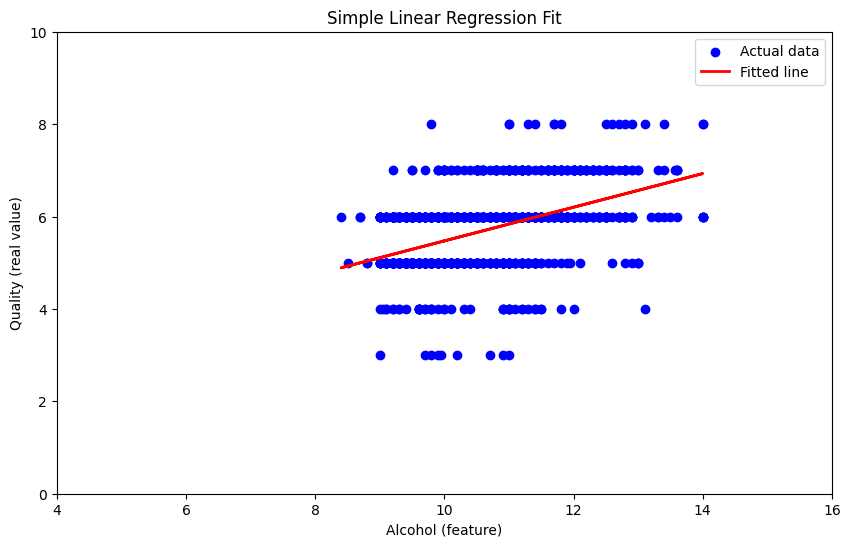

In [8]:
# Plotting the actual data points
plt.figure(figsize=(10, 6))
plt.scatter(df_train_feature_alcohol, df_train_target, color='blue', label='Actual data')

# Plotting the regression line
plt.plot(df_train_feature_alcohol, model1.predict(df_train_feature_alcohol), color='red', linewidth=2, label='Fitted line')

# Limits of the axes
plt.xlim(4, 16)
plt.ylim(0, 10)

# Adding labels and title
plt.ylabel('Quality (real value)')
plt.xlabel('Alcohol (feature)')
plt.title('Simple Linear Regression Fit')
plt.legend()


This is what we can conclude only with the plot:

* Dots follow the vertical. This indicated that the alcohol is not the unique variable that could explain the quality of the wine.
* The prediction line increase. We could translate this as "more alcohol, more quality of the wine".
* Dots are not very close to the line what means that probably there are other factor that are affecting in the quality.

### B. Compute our first multiple linear regression model

In this case, we are going to include all the features that we have to predict the quality (target). The steps are as in the simple model.

In [9]:
# Create MLRM and fit it
regression2 = LinearRegression()

# Fit the model
model2 = regression2.fit(df_train_features.sort_index(), df_train_target.sort_index()) # Features first then target

# Show the equation values:
print("Intercept :", model2.intercept_ )
print("Coefficients :", model2.coef_)

Intercept : 16.634693491940222
Coefficients : [ 2.03288413e-02 -1.02555421e+00 -1.51014281e-01  1.16167979e-02
 -1.49002597e+00  5.47302465e-03 -3.37647532e-03 -1.23669162e+01
 -5.33610421e-01  8.87103957e-01  2.96795462e-01]


Whith this information we can build the equation of the model:

$$
\hat{y} = 16.635 + 0.020 · x_1 - 1.026 · x_2 - 0.151 · x_3 + 0.012 · x_4 - 1.490 · x_5 + 0.005 · x_6 - 0.003 · x_7 - 12.367 · x_8 - 0.534 · x_9 + 0.887 · x_{10} + 0.298 · x_{11}
$$

We can see that we have negative and positive values in the coeficients. We interpretate as follow:

* **Positive**: A high value in that feature, increase the value of the taarget.
* **Negative**: A high value in that feature, decrease the value of the taarget.

If we replace the features for our first case we obtain this:

In [10]:
print("Value of all features for our first case :", df_train_features.iloc[0:1])

Value of all features for our first case :      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
366           12.8             0.615         0.66             5.8      0.083   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
366                  7.0                  42.0   1.0022  3.07       0.73   

     alcohol  
366     10.0  


For the first case the final equation looks like:

$$
\hat{y} = 16.634 + 0.020 \cdot 12.8 - 1.026 \cdot 0.615 - 0.151 \cdot 0.66 + 0.012 \cdot 5.8 - 1.490 \cdot 0.083 + 0.005 \cdot 7.0 - 0.003 \cdot 42.0 - 12.367 \cdot 1.0022 - 0.534 \cdot 3.07 + 0.887 \cdot 0.73 + 0.298 \cdot 10.0
$$

And the quality predicted value :

$$
\hat{y} \approx 5.608
$$

We can do this using our script:

In [11]:
model2_y = pd.DataFrame(model2.predict(df_train_features), 
                      index=df_train_features.index, 
                      columns=['Multiple Model'])

print("Quality predicted value for the frst case:", model2_y.sort_index().head(1))

Quality predicted value for the frst case:    Multiple Model
1        5.162484


Represent now in a plot

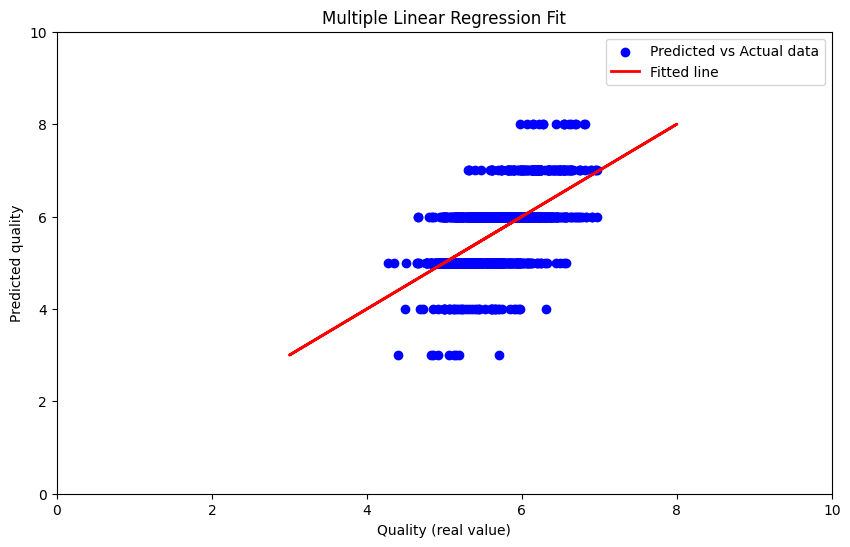

In [12]:
# Plotting the actual data points
plt.figure(figsize=(10, 6))
plt.scatter(model2.predict(df_train_features.sort_index()), df_train_target.sort_index(), color='blue', label='Predicted vs Actual data')

# Plotting the regression line
plt.plot(df_train_target.sort_index(), df_train_target.sort_index(), color='red', linewidth=2, label='Fitted line')

# Limits of the axes
plt.xlim(0, 10)
plt.ylim(0, 10)

# Adding labels and title
plt.xlabel('Quality (real value)')
plt.ylabel('Predicted quality')
plt.title('Multiple Linear Regression Fit')
plt.legend()

# 2. Features modifications 

### A. Interacction effect

Some times, features could not show an effect in the target by it selfs, but the combinations of them does. We can include this type of effect including an interaction term in the model. 

Including interaction terms in the model allows for the possibility that the relationship between the predictors and the target variable is not additive ($ \hat{\beta}_1 · x_1 +  \hat{\beta}_2 · x_2 $) but varies depending on the levels of other predictors ($ \hat{\beta}_3 · x_1 · x_2 $).

Imagine we have an original model with two features: x1 and x2. As we see the introduction, the model will take this form:

$$
\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1 + \hat{\beta}_2 x_2 + \epsilon
$$

If we suspect some interaction between this two features, we can add the interaction effect as follow:

$$
\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1 + \hat{\beta}_2 x_2 + \hat{\beta}_3 x_1 x_2 + \epsilon
$$

Some relevant things:
* We can include as many interaction effects as we want, if there are interesting. However, think in the relevance for include them because we take the risk of overfitting in our model.
* An interaction effect could include more than two features. For example ($ \hat{\beta}_3 · x_1 · x_2 · x_3 $). If you decide this is interesting in your case, take care about the overfitting and the dificulty of interpreate the interaction.
* It is not necessary include interaction for all the features involve in the model. If we have a model with three features, and we thing only the interaction between $ x_1 $ and $ x_2 $ is ineresting, then we can create a model like this: $ \hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1 + \hat{\beta}_2 x_2 + \hat{\beta}_3 x_3 + \hat{\beta}_4 x_1 x_2 + \epsilon $

The domain knowledge and a visualization that shows the effect in the target using two features could be useful to decide when include an interaction.

We will se how to do this in python.


### Multi-linear regression model all features plus an interaction between two of them

As before, alochol is our target variable. As predictors we include all the feautres plus the interaction between free sulfur dioxide and alochol.

First, we create the interaction:



In [13]:
interaction = PolynomialFeatures(
    degree=2,                    # How many features combinations we want to create
    include_bias=False,          # Exclude the bias term 
    interaction_only=True        # Only include interaction effects (not x^2, x^3, etc.)
    )

Now, we have to transform and fit the interaction between free sulfur dioxide and alcohol:

In [14]:
features_interaction = interaction.fit_transform(df_train_features[['free sulfur dioxide', 'alcohol']])

# This is not necessary but is good to see the results. Transform the array into a dataframe:
features_interaction = pd.DataFrame(features_interaction,
                                      columns = interaction.get_feature_names_out(['free sulfur dioxide', 'alcohol']),
                                      index=df_train_features.index  # This line ensures the index is carried over. Example, index 10 doesn´t should appear
                                   )
print(features_interaction.sort_index().head(1))


   free sulfur dioxide  alcohol  free sulfur dioxide alcohol
1                 25.0      9.8                        245.0


As we see, the interaction include the simple features (because degree = 2 includes degree = 1 that are the simple effects) and the interaction. We are only interested in the interaction column (free sulfur dioxide alcohol) so we extract only that column and we add it to our original features df: 

In [15]:
interaction_column = features_interaction[['free sulfur dioxide alcohol']].sort_index()
print(interaction_column.sort_index().head(5))

   free sulfur dioxide alcohol
1                        245.0
2                        147.0
3                        166.6
4                        103.4
5                        122.2


We add the interaction column to our original feature df. We are going to create a new df to show that is a modified version.

In [16]:
df_train_features_modified = df_train_features.join(interaction_column, how='outer')
pd.set_option('display.max_rows', 1600) 
print(df_train_features_modified.sort_index().head(5))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  free sulfur dioxide alcohol  
1      9.8                        245.0  
2 

Now, we have a new df with all the original features plus one with the interaction (the last one).

**!!! Important**. We have done this only for train data. In a normal workflow, this step must be done **before** split the df in test and training. In the final example we are going to see a compleate process.

With our final df, features_interaction_modified, we can fit the model and obtain the intercept and coefficients:

In [17]:
# Create MLRM and fit it
regression3 = LinearRegression()

# Fit the model
model3 = regression3.fit(df_train_features_modified, df_train_target.sort_index()) # Features first then target

# Show the equation values:
print("Intercept :", model3.intercept_ )

# New way to obtain the coefficients with names and round them to three decimals:
feature_names = df_train_features_modified.columns
coefficient_dict = dict(zip(feature_names, model3.coef_))
print("Coefficients :")
for feature, coef in coefficient_dict.items():
    print(f"{feature}: {coef:.3f}")

Intercept : 15.24954829635005
Coefficients :
fixed acidity: 0.018
volatile acidity: -1.023
citric acid: -0.128
residual sugar: 0.015
chlorides: -1.459
free sulfur dioxide: -0.021
total sulfur dioxide: -0.003
density: -10.538
pH: -0.540
sulphates: 0.872
alcohol: 0.258
free sulfur dioxide alcohol: 0.003


Now build the equation of the model:

$$
\hat{y} = -19.912 -0.013 · x_1 - 0.239 · x_2 + 0.199 · x_3 - 0.022 · x_4 + 0.454 · x_5 + 0.007 · x_6 + 0.001 · x_7 + 24.904 · x_8 + 0.136 · x_9 - 0.257 · x_{10} + 0.054 · x_{11} - 0.0005 · x_{6} · x_{11}
$$

As we see, the interaction coefficient is negative. It means that when we have higher levels of alcohol, the effect of free sulfur dioxide in the quality is less positive or negative. However, as we see, the size of the coefficients is ver low.

If we replace the features for our first case we obtain this:

In [18]:
# Notice that we use df_train_features_modified
print("Value of all features for our first case :", df_train_features_modified.iloc[0:1]) 

Value of all features for our first case :    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1            7.8              0.88          0.0             2.6      0.098   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
1                 25.0                  67.0   0.9968  3.2       0.68   

   alcohol  free sulfur dioxide alcohol  
1      9.8                        245.0  


We replace the variable information:

In [19]:
model3_y = pd.DataFrame(model3.predict(df_train_features_modified), 
                      index=df_train_features_modified.index, 
                      columns=['Interaction Model'])

print("Quality predicted value for the frst case:", model3_y.sort_index().head(1))

Quality predicted value for the frst case:    Interaction Model
1           5.145824


An error occurred while committing kernel: ConcurrencyViolation Sequence number must match Draft record: KernelId=55703157, ExpectedSequence=611, ActualSequence=608, AuthorUserId=4700056
### B. No linear relations

In linear model we expect the relation between target and feature will be constant. When it does't happen the relation is no lineal. For example, imagine a student that is preparing an exam. In general, more hours of study means a better score. However, this relation is not linear. Study one hour doesn't mean obtain a one score in the test, or study seven hour doesn't mean score as seven. The relation is exponencial between the target (score) and the feature (number of hours of study).

A model that include a no lineal effect in a feature take this aspect:

$$
\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1 +  \hat{\beta}_2 x_1^2 + ... + \hat{\beta}_n x_n + \epsilon
$$

Where:

* $ x_1 $: Is the feature with a lineal efect.
* $ x_1^2 $: Is the same feature with a no-linear association. $ ^2 $ are the grades of the polinomio.

The procedure is similar to the interaction effect. We are going to create the compleate model including a no linear regression for sulphite feature.

We start creating a new feature $ sulphite^2 $ that is the same as $ suphite · sulphite $ (a interaction between the same feature).

In [20]:
polynomial = PolynomialFeatures(
    degree=2,                    # We need a interaction with two degrees.
    include_bias=False,          # Exclude the bias term 
    interaction_only=False       # NEW. Include polynomia effects. In our case only x^2 because we are interesting in 2 degrees.
    )

Fit the model:

In [21]:
features_polynomial = polynomial.fit_transform(df_train_features[['sulphates']].sort_index())

# This is not necessary but is good to see the results. Transform the array into a dataframe:
features_polynomial = pd.DataFrame(features_polynomial,
                                   columns = polynomial.get_feature_names_out(),
                                   index=df_train_features.index  # This line ensures the index is carried over. Example, index 10 doesn´t should appear
                                   )
print(features_polynomial.sort_index().head(20))

    sulphates  sulphates^2
1        0.70       0.4900
2        0.76       0.5776
3        0.60       0.3600
4        0.73       0.5329
5        0.49       0.2401
6        0.64       0.4096
7        0.57       0.3249
8        0.50       0.2500
9        0.70       0.4900
11       0.50       0.2500
12       0.66       0.4356
13       0.50       0.2500
14       0.82       0.6724
16       0.60       0.3600
19       0.84       0.7056
20       1.13       1.2769
21       0.57       0.3249
22       0.60       0.3600
23       0.46       0.2116
24       0.82       0.6724


We need only the $ sulphates^2 $ column. First, we isolete that column and then we add it to the original feature df (we create a new dataframe for this new data)

In [22]:
# Isolate the polynomial feature
polynomial_column = features_polynomial[['sulphates^2']].sort_index()

# Add to the other features (and create a new features df)
df_train_features_polynomial = df_train_features.join(polynomial_column, how='outer')
print(df_train_features_polynomial.sort_index().head(5))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  sulphates^2  
1      9.8       0.4900  
2      9.8       0.5776  
3      9

**!!! Important**. We have done this only for train data. In a normal workflow, this step must be done **before** split the df in test and training. In the final example we are going to see a compleate process.

With our final df, features_interaction_modified, we can fit the model and obtain the intercept and coefficients:

In [23]:
# Create MLRM and fit it
regression4 = LinearRegression()

# Fit the model
model4 = regression4.fit(df_train_features_polynomial.sort_index(), df_train_target.sort_index()) # Features first then target

# Show the equation values:
print("Intercept :", model4.intercept_ )

# New way to obtain the coefficients with names and round them to three decimals:
feature_names = df_train_features_polynomial.columns
coefficient_dict = dict(zip(feature_names, model4.coef_))
print("Coefficients :")
for feature, coef in coefficient_dict.items():
    print(f"{feature}: {coef:.3f}")

Intercept : 16.66306821940761
Coefficients :
fixed acidity: 0.020
volatile acidity: -1.026
citric acid: -0.151
residual sugar: 0.012
chlorides: -1.487
free sulfur dioxide: 0.005
total sulfur dioxide: -0.003
density: -12.404
pH: -0.532
sulphates: 0.887
alcohol: 0.297
sulphates^2: 0.008


Now build the equation of the model:

$$
\hat{y} = -19.002 -0.014 · x_1 - 0.229 · x_2 + 0.199 · x_3 - 0.021 · x_4 + 0.467 · x_5 + 0.002 · x_6 + 0.001 · x_7 + 24.062 · x_8 + 0.114 · x_9 + 0.011 · x_{10} + 0.045 · x_{11} - 0.158 · x_{10}^2
$$

As we see, the polynomial coefficient is negative. It means that when we have higher levels of sulphates, the level of quality (target) decrees. As is a polynomial feature, it means that the decrising on quality is faster.

If we replace the features for our first case we obtain this:

In [24]:
model4_y = pd.DataFrame(model4.predict(df_train_features_polynomial.sort_index()), 
                      index=df_train_features_polynomial.index, 
                      columns=['Polinomyal Model'])

print("Quality predicted value for the frst case:", model4_y.sort_index().head(1))

Quality predicted value for the frst case:    Polinomyal Model
1          5.162267


We create a plot comparing the predicted value (x-axe) vs the real on (y-axe). We round our predicted value to 0 decimal because the original scale of quality (target) is an integer with no decimals. As we can see, our model predicts for all wines qualities between 5 and 6 while the original values of qualities range between 3 and 8.

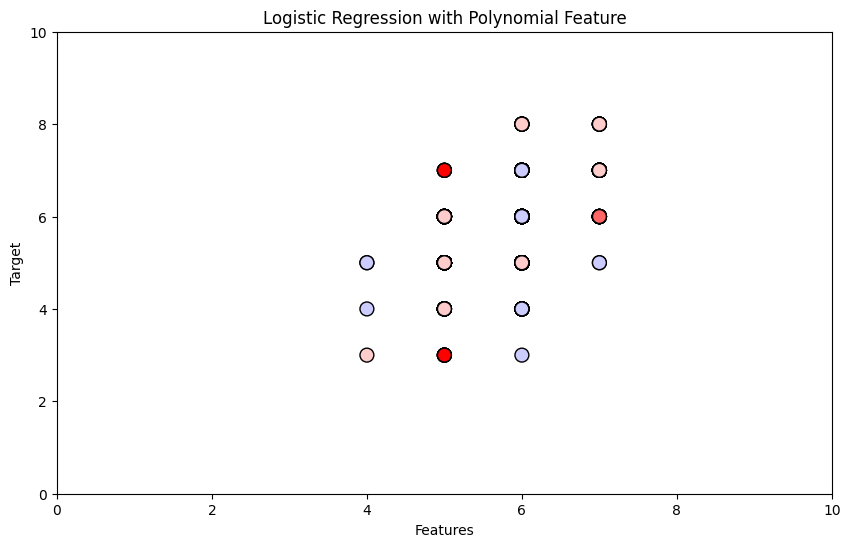

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(np.round(model4.predict(df_train_features_polynomial)), df_train_target.sort_index(), c=df_train_target, cmap='bwr', edgecolors='k', s=100)
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel('Features')
plt.ylabel('Target')
plt.title('Logistic Regression with Polynomial Feature')
plt.show()

# 3. Optimization techniques

Scikit-learn give a lot of options about what estimator use. The image bellow shows the huge variety this package includes, not only for regression, if not different techniques. You can see more information in https://scikit-learn.org/stable/_static/ml_map

<div style="text-align:center">
    <img src="https://scikit-learn.org/stable/_static/ml_map.png" alt="Scikit-Learn estimators" width="700" height="500">
</div>

The **optimization algorithms** are techniques used to find the best solution to a problem, usually trying to fin the minimun or the maximun in a function. Some key concepts:

* **Objetive function**: Function we want to optimize.
* **Minimun and Maximun**: We look for the minimun when we try to obtain the parameters that minimze the error. We look for the maximun when try to found the features that maximize the gaprofitsins.
* **Stopping Conditions**: Criterial that sais when stop to search for the optimal solution. For example, we fix the number of iterations or when the improvements in the objetive function is bellow a specif threshold.
* **Optimal point**: Input value that produces the minimum or maximun value of the objetive function.
* **Gradient**: Vector that inicates the direction and magnitude of the steepest change in a function.

**Residual Sum of Squares (RSS)**: Metric to compute the differences between real values and estimate values. It follows this formula:

$$
RSS = \sum_{i=1}^{n} ( y_i - \hat{y}_i )^2
$$

Where:

* i: is the specific row.
* n: is the total sample.
* $y_i$ is the real value of the target.
* $\hat{y}_i$: is the estimated value of the target.

Regularization model includes some penalization to this RSS.

### A. Ordinary Least Square (OLS)

* The aim is minimize the square sum of the errors (differences between predictions and real values). 
* Usefull when the errors follows a normal distribution and there are no outliers.


### B. Grdient Descent

* Iterative process to find the optime parameters.
* Use all the sample.
* Parameter are update in the oposite direction of the gradient of the loss function.
* Search the local or global minimun.
* Slower than other model when the linear regression problem is simple but is more flexible so it is useful with complex problems.

### C. SGD Regressor (Stochastic Gradient Descent)

* Variant od Gradient Descent.
* Search for the minimun to update the model parameters.
* Use when you have large samples.
* Use a random sample of the data in each iteration. This is the reason to use with large datasets (large training samples).


### D. Regularization

Differences between Lasso and Ridge Regression:

| | Ridge Regression | Lasso Regression |
|:--:| :--:|:--:|
|Penalty term| Proportional to the square of the square of the magnitude of the coefficients: $ \Theta^2 $ | Proportional to the absolute value of the coefficients $ |\Theta| $. It could drive some coefficients to 0|
|Aim| Reduce the overfit and reduce the complexity of the model| Reduce the complexity and automatically select some features (driven their coefficients to 0, in other words, deleting it)|
|Predictions| Better| More interpretable|

**$\alpha$**: Hiperparameter that controls how much is going to be penalize. Higher the value, more simple models. To select the best value, a tuning process must be done. **WARNING** in Lasso, if we pick a large value we can deleate a lot of features because their coefficients will go to 0.

#### A. Ridge Regression

When use it:
* Big correlation between features
* Number of features > number of observations (sobredimensional models)
* When we want to reduce the overfiting but not the multicollinearity.

This model penalizes as follow:

$$
RSS + \alpha ·  \sum_{j=1}^{p} (\hat{\beta} _j )^2
$$

Where:

* j: is a specific feature.
* p: is total number of features.
* $\beta$ is the coeficient of the feature.
* $\alpha$: is the hiperparameter.

#### B. Lasso Regression

This model penalizes as follow:

$$
\frac{1}{2n}· RSS + \alpha ·  \sum_{j=1}^{p} |\hat{\beta}_j|
$$

Where:

* j: is a specific feature.
* p: is total number of features.
* $\beta$ is the coeficient of the feature.
* $\alpha$: is the hiperparameter.
* n: Number of obervations.

#### C. Elastic Net

Combine Ridge and Lasso.


#### Ridge Regression

Create the Ridge Regression Model and select different values for the hiperparameter $\alpha$

In [26]:
# Create the model with different values for alpha
ridge_regression = RidgeCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100])


Adjust the model:

In [27]:
ridge_model = ridge_regression.fit(df_train_features.sort_index(), df_train_target.sort_index())

View the coefficients and the best value of $\alpha$:

In [28]:
print("Coefficients :", ridge_model.alpha_)
print("Intercept :", ridge_model.intercept_ )

feature_names = df_train_features.columns
coefficient_dict = dict(zip(feature_names, ridge_model.coef_))
print("Coefficients :")
for feature, coef in coefficient_dict.items():
    print(f"{feature}: {coef:.3f}")

Coefficients : 0.1
Intercept : 4.573099061086399
Coefficients :
fixed acidity: 0.009
volatile acidity: -1.037
citric acid: -0.153
residual sugar: 0.006
chlorides: -1.427
free sulfur dioxide: 0.006
total sulfur dioxide: -0.003
density: -0.093
pH: -0.586
sulphates: 0.861
alcohol: 0.309


Now build the equation of the model:

$$
\hat{y} = 4.573 + 0.009 · x_1 -1.037 · x_2 - 0.153 · x_3 + 0.0011 · x_4 + - 1.427 · x_5 + 0.006 · x_6 - 0.003 · x_7 - 0.093 · x_8 - 0.586 · x_9 + 0.861 · x_{10} + 0.309 · x_{11} 
$$


As we see, the polynomial coefficient is negative. It means that when we have higher levels of sulphates, the level of quality (target) decrees. As is a polynomial feature, it means that the decrising on quality is faster.

If we replace the features for our first case we obtain this:

In [29]:
print("Value of all features for our first case :", df_train_features.sort_index().iloc[0:1]) 

Value of all features for our first case :    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1            7.8              0.88          0.0             2.6      0.098   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  alcohol  
1                 25.0                  67.0   0.9968  3.2       0.68      9.8  


In the equation:

$$
\hat{y} = 4.573 + 0.009 · 7.8 - 1.037 · 0.88 - 0.153 · 0 + 0.001 · 2.6 - 1.427 · 0.098 + 0.006 · 25 - 0.003 · 67 - 0.093 · 0.997 - 0.586 · 3.2 + 0.861 · 0.68 + 0.309 · 9.8 \approx 5.188
$$

If we compute in python:

In [30]:
ridge_model_y = pd.DataFrame(ridge_model.predict(df_train_features), 
                      index=df_train_features.index, 
                      columns=['Ridge Model'])

print("Quality predicted value for the frst case:", ridge_model_y.sort_index().head(1))

Quality predicted value for the frst case:    Ridge Model
1     5.164368


#### Lasso Regression

Create the Lasso Regression Model and select different values for the hiperparameter $\alpha$

In [31]:
lasso_regression = LassoCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100])


Adjust the model:

In [32]:
lasso_model = lasso_regression.fit(df_train_features, df_train_target)

View the coefficients and the best value of $\alpha$:

In [33]:
print("Coefficients :", lasso_model.alpha_)
print("Intercept :", lasso_model.intercept_ )

feature_names = df_train_features.columns
coefficient_dict = dict(zip(feature_names, lasso_model.coef_))
print("Coefficients :")
for feature, coef in coefficient_dict.items():
    print(f"{feature}: {coef:.3f}")

Coefficients : 0.001
Intercept : 3.9810386276245433
Coefficients :
fixed acidity: 0.012
volatile acidity: -1.012
citric acid: -0.074
residual sugar: 0.004
chlorides: -0.803
free sulfur dioxide: 0.006
total sulfur dioxide: -0.003
density: -0.000
pH: -0.457
sulphates: 0.768
alcohol: 0.311


Now build the equation of the model:

$$
\hat{y} = 3.981 + 0.012 · x_1 -1.012 · x_2 - 0.074 · x_3 + 0.004 · x_4 + - 0.803 · x_5 + 0.006 · x_6 - 0.003 · x_7 - 0 · x_8 - 0.457 · x_9 + 0.768 · x_{10} + 0.311 · x_{11} 
$$


As we see, tthe coefficient for *density* drops to 0

If we replace the features for our first case we obtain this:

In [34]:
print("Value of all features for our first case :", df_train_features.sort_index().iloc[0:1]) 

Value of all features for our first case :    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1            7.8              0.88          0.0             2.6      0.098   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  alcohol  
1                 25.0                  67.0   0.9968  3.2       0.68      9.8  


In the equation:

$$

\hat{y} = 3.981 + 0.012 · 7.8 -1.012 · 0.88 - 0.074 · 0 + 0.004 · 2.6 + - 0.803 · 0.098 + 0.006 · 25 - 0.003 · 67 - 0 · 0.997 - 0.457 · 3.2 + 0.768 · 0.68 + 0.311 · 9.8 \approx 5.172

$$

If we compute in python:

In [35]:
lasso_model_y = pd.DataFrame(lasso_model.predict(df_train_features), 
                      index=df_train_features.index, 
                      columns=['Lasso Model'])

print("Quality predicted value for the first case:", lasso_model_y.sort_index().head(1))

Quality predicted value for the first case:    Lasso Model
1      5.14118


# 4. Quantiy the fit

### A. Coefficient of determination $R^2$

Definition: "Proportion of target varianze that could be predict using the targeys".

This coefficient is used to compare the efficiency of different models and determine which of them fix better the observate data.

The formula is as follow:

$$
R^2 = 1 - \frac{SS_{res}}{SS_{total}}
$$

* Residual Sum Square ($SS_{res}$): 

$$
SS_{res} = \sum(y_i - \hat{y_i})^2
$$

* Total Sum Square ($SS_{total}$): 

$$
SS_{total} = \sum(y_i - \bar{y_i})^2
$$

The nomenclature used in this is formulas:

* $y_i$: Real values of the target.
* $\hat{y_i}$: Target values predicted by the model.
* $\bar{y_i}$: Mean of the real values ($y_i$).

Interpretation:

* $R^2$ = 1. The model is perfect. The features explain all the variability of the target. The residues are minimus.
* $R^2$ = 0. The model doesn´t explain the variability in the data. Is not more useful than use the mean of the data as a predictor of each observation.
* $R^2$ < 0. The model made worse than using simply the mean.

Characteristics:

* Although it is odd, the model could be worse than use only the mean.

* When the prediction residuals have zero mean, the score is identical to the Explained Variance score.

We are going to explore the models that we generate in previous steps:

In [36]:
# Sort by index
df_train_target = df_train_target.sort_index()
model1_y = model1_y.sort_index()
model2_y = model2_y.sort_index()
model3_y = model3_y.sort_index()
model4_y = model4_y.sort_index()
ridge_model_y = ridge_model_y.sort_index()
lasso_model_y = lasso_model_y.sort_index()

# Ensure all preidctions and real observations has the same index:
assert df_train_target.index.equals(model1_y.index), "Indices do not match"
assert df_train_target.index.equals(model2_y.index), "Indices do not match"
assert df_train_target.index.equals(model3_y.index), "Indices do not match"
assert df_train_target.index.equals(model4_y.index), "Indices do not match"
assert df_train_target.index.equals(ridge_model_y.index), "Indices do not match"
assert df_train_target.index.equals(lasso_model_y.index), "Indices do not match"
print("Indices match successfully!")

predictions = pd.DataFrame({
    'Actual Target': np.squeeze(df_train_target), # Real values
    'Simple Model': np.squeeze(model1_y),
    'Multiple Model': np.squeeze(model2_y),
    'Interaction Model': np.squeeze(model3_y),
    'Polynomial Model': np.squeeze(model4_y),
    'Ridge Model': np.squeeze(ridge_model_y),
    'Lasso Model': np.squeeze(lasso_model_y),
})

print(predictions.head())

Indices match successfully!
   Actual Target  Simple Model  Multiple Model  Interaction Model  \
1              5      5.327065        5.162484           5.145824   
2              5      5.946399        5.213026           5.212054   
3              6      5.618516        5.686151           5.685478   
4              5      5.654948        4.995446           5.004634   
5              5      5.144908        5.027484           5.030856   

   Polynomial Model  Ridge Model  Lasso Model  
1          5.162267     5.164368     5.141180  
2          5.213692     5.216523     5.198900  
3          5.685397     5.676837     5.680926  
4          4.996003     4.999413     5.005788  
5          5.025714     5.032526     5.038046  


Now we are going to calculate the $R^2$ coefficient:

In [37]:
r2_scores = {}
r2_scores['Simple Model'] = r2_score(predictions['Actual Target'], predictions['Simple Model'])
r2_scores['Multiple Model'] = r2_score(predictions['Actual Target'], predictions['Multiple Model'])
r2_scores['Interaction Model'] = r2_score(predictions['Actual Target'], predictions['Interaction Model'])
r2_scores['Polynomial Model'] = r2_score(predictions['Actual Target'], predictions['Polynomial Model'])
r2_scores['Ridge Model'] = r2_score(predictions['Actual Target'], predictions['Ridge Model'])
r2_scores['Lasso Model'] = r2_score(predictions['Actual Target'], predictions['Lasso Model'])

# Print the R2 scores
for model, score in r2_scores.items():
    print(f"R2 score for {model}: {score:.4f}")


R2 score for Simple Model: -0.1973
R2 score for Multiple Model: 0.3633
R2 score for Interaction Model: 0.3644
R2 score for Polynomial Model: 0.3633
R2 score for Ridge Model: 0.3631
R2 score for Lasso Model: 0.3615


We can see that the model that includes all the features without transformation is the model that works better. On the other side, model where were transform one feature (interaction and polynomial) are the ones that shows the wors behaviour.

### B. Adjusted coefficient of determination $R^2$

**Why to use it?**: When we add more predictiors to the model, $R^2$ always increase (or at least doesn´t decrease). The problem is that adjusted is not as inerpretable than $R^2$.

Formula looks like follows:

$$
R^2 = 1 - \left( \frac{SS_{\text{res}}}{SS_{\text{total}}} \right) \cdot \left( \frac{N-1}{N-K-1} \right)
$$

Where:

* $SS_{\text{res}}$ and $SS_{\text{total}}$ are the same as in $R^2$.
* **N**: Number of observations in the data.
* **K**: Number of features used in the model (excluding the intercept)

The second part of the formula is the part that adjust for Degrees of Freedom.

# 5. Hypothesis tests

Two aproximations:

* A. See if the model proposed is better than the null model.
* B. Test if a particular coefficient is statistical different from 0




### A. Compare with the null model

The null model (baseline model) is that one that no use any feature to predict the target.

The null hypothesis is that there are no relation between the features and the target.

**Null model**: Consist in that model that predict using only the mean or the median

$$
\hat{y_i} = \bar{y_i}:
$$

Where:

* $\hat{y_i}$: Prediction.
* $\bar{y_i}$: Mean of the target values in the training set.

We can follow three strategies:

#### a. Difference in $R^2$

Compare the values of the coefficient of determination between the null model and an alternative model. Following this we are going to know what model works better, but we can ensure if one works significatilly better than the other. 

#### b. F-test for nested models (Extra Sum of Squares Test)

This approach is used when the alternative modell is equal to the null model plus some additional predictors.

We calculate if the explained variance in the full modell is significantly greater than in the null model relative to the increase in degrees of fredoon (number of predictors).

Formula:

$$
F = \frac{\frac{(R^2_{\text{full}} - R^2_{\text{reduced}})}{p}}{\frac{(1 - R^2_{\text{full}})}{(n - p - 1)}} 
$$


Where:
* $R^2_{\text{full}}$ is the R-squared of the full model (with the additional predictors).
* $R^2_{\text{reduced}}$ is the R-squared of the reduced model (null model).
* $p$ is the number of extra predictors added to the reduced model to get the full model.
* $n$ is the total number of observations.

### c. Information Criteria (AIC\BIC)

* **AIC**: Akaike Information Criterion. Focus on selecting the model that most closely approximates the truth. Disadvantage: It can favor mode complex model (risk of overfitting). Use when all model to compare have the same complexity or when the models are nested.
* **BIC**: Bayesian Information Criterion. Strong penalty for complexity, often favoring simpler model especially as sample size grows. Preferable when dealing with very large datasets.

**Characteristics**:

* Meassure the complexity of the model penalizing unnecessary complexity (too much predictors). 
* Lowe values of AIC and BIC means a better model.
* A significant drop in AIC and BIC values when move from null model to the alternative model can suggest that the increase in the model complexity is justified.
* Interesting when you are interested in model selection or balancing models.

**Interpretation**: There is no way to test if the improvements is significative. However, there is a rule of thumb. We can apply for both, AIC and BIC:

* Diferences 2: No siginificative.
* Differences between 2 and 6: Some evidence against the model with the higher value of the criterion. This means the model with the lower AIC\BIC is better.
* Differences between 6 and 10: Strong evidence that the model with the lower criterios is better.
* Difference > 10. Very strong evidence.

### Now we are going to implement these three approachs in Python:

#### a.  Difference in $R^2$
We are going to create the null value and compare with the other models we have, then we use the F-test approach and finally the Information Criteria approach.

In [38]:
# Empty model: Always predict the mean
mean_regressor = DummyRegressor(strategy='mean')
mean_regressor.fit(df_train_features.sort_index(), df_train_target.sort_index())
target_pred_mean = mean_regressor.predict(df_train_target.sort_index())
print(target_pred_mean)

[5.6247068 5.6247068 5.6247068 ... 5.6247068 5.6247068 5.6247068]


Now, we compute $R^2$ for our nul model:

In [39]:
r2_null_model = r2_score(df_train_target, target_pred_mean)
print("R² del Modelo Vacío:", r2_null_model)

R² del Modelo Vacío: 0.0


Now compare the $R^2$ of each model:

In [40]:
# Predictions as df
df_r2_scores = pd.DataFrame(list(r2_scores.items()), columns=['Model', 'R-squared'])

# Add the new column
null_model_row = pd.DataFrame({'Model': ['Null Model'], 'R-squared': [r2_null_model]})
df_r2_scores = pd.concat([df_r2_scores, null_model_row], ignore_index=True)

print(df_r2_scores)

               Model  R-squared
0       Simple Model  -0.197251
1     Multiple Model   0.363267
2  Interaction Model   0.364398
3   Polynomial Model   0.363275
4        Ridge Model   0.363123
5        Lasso Model   0.361542
6         Null Model   0.000000


As we can see, the all the models predict better than the null model.

#### b. F-test for nested models (Extra Sum of Squares Test)

In stat model we need to include a constant if we want an intercept in the model.

In [41]:
# Creare a df for the null model. As we don´t have predictors, only a constant is present.
null_features   = sm.add_constant(pd.DataFrame(index=df_train_features.index)).sort_index()
full_features   = sm.add_constant(df_train_features).sort_index()

#reduce_model = sm.add_constant(X_reduced)
print("Null features:\n", null_features.tail(5), "\nMultiple Regression features:\n", full_features.tail(5))

Null features:
       const
1594    1.0
1595    1.0
1596    1.0
1597    1.0
1598    1.0 
Multiple Regression features:
       const  fixed acidity  volatile acidity  citric acid  residual sugar  \
1594    1.0            6.2             0.600         0.08             2.0   
1595    1.0            5.9             0.550         0.10             2.2   
1596    1.0            6.3             0.510         0.13             2.3   
1597    1.0            5.9             0.645         0.12             2.0   
1598    1.0            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
1594      0.090                 32.0                  44.0  0.99490  3.45   
1595      0.062                 39.0                  51.0  0.99512  3.52   
1596      0.076                 29.0                  40.0  0.99574  3.42   
1597      0.075                 32.0                  44.0  0.99547  3.57   
1598      0.067                 

Use OLS to fit each model:

In [42]:
# Fit the models using OLS
model_null = sm.OLS(df_train_target.sort_index(), null_features.sort_index()).fit()
model_full = sm.OLS(df_train_target.sort_index(), full_features.sort_index()).fit()

# Summary of the models
print("Null Model Summary:")
print(model_null.summary())
print("\nFull Model Summary:")
print(model_full.summary())

Null Model Summary:
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 07 May 2024   Prob (F-statistic):                nan
Time:                        17:56:31   Log-Likelihood:                -1542.8
No. Observations:                1279   AIC:                             3088.
Df Residuals:                    1278   BIC:                             3093.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6247      0.023

Now we compare if full model is nested within null model:

In [43]:
f_test = model_full.compare_f_test(model_null)
print("\nF-test result:", f_test)


F-test result: (65.7132919873751, 5.379288480976191e-116, 11.0)


**Results**:

* **F statistic value**: 65.713. This is the calculated F-statistic for the test. It represents the ratio of the model fit improvement per added predictor to the error of the larger model (including all predictors). A higher F-statistic indicates that the additional predictors in the full model provide a significant improvement in fit over the reduced model.
* **P-value**: 5.379-116 = <0.001. Probability under the null hypothesis of observing the F-statistic, or one more extreme, given that the null hypothesis is true. Here, the null hypothesis typically states that the additional predictors in the full model do not improve the fit of the model meaningfully compared to the reduced model. A very small p-value, as in this case (which is virtually zero), strongly suggests rejecting the null hypothesis. This means that the additional predictors do significantly improve the model.
* **Degrees of Freedom**: 11.0. This number represents the degrees of freedom associated with the numerator of the F-statistic, which is generally equal to the number of additional parameters added to the reduced model to get the full model. Here, 11 extra parameters were added to the reduced model to form the full model.

**Overall conclusion**: The features in the full model improve the prediction VS the null model.

#### c. Information criteria (AIC/BIC)

Same steps as in b to obtain model_null and model_full. As we have these step done yet, we pass to see the AIC and BIC criterials in each model:

In [44]:
print("Null model AIC:", round(model_null.aic, 3), "Full model AIC:", round(model_full.aic, 3))
print("Null model BIC:", round(model_null.bic, 3), "Full model BIC:", round(model_full.bic, 3))


Null model AIC: 3087.592 Full model AIC: 2532.244
Null model BIC: 3092.746 Full model BIC: 2594.09


We compute Deltas (differences) to interpretate the results:

In [45]:
# Diferences:
delta_aic = model_null.aic - model_full.aic
delta_bic = model_null.bic - model_full.bic

print("Delta AIC:", round(delta_aic), "\nDelta BIC:", round(delta_bic))


Delta AIC: 555 
Delta BIC: 499


As we can see, the differences are large so we can conclude the full model is better making predictions than the null model.

### B. Test if a particular coefficient is statistical different from 0

This approach let as know each predictor in the model separately. We can test if a particular predictor have a statistically significant relationship with the target. If the coefficient is statistically different from 0, then wecan conclude there is a relationship.

Scikit-learn package has no a direct way to compute it but we can fit the model with Scikit-Learn and then use the statsmodel from package stats to explore the statistical summary.

We are going to use the model with all features that we compute in the Multiple linear regression section.

In [46]:
print(model2.intercept_)
print(model2.coef_)

16.634693491940222
[ 2.03288413e-02 -1.02555421e+00 -1.51014281e-01  1.16167979e-02
 -1.49002597e+00  5.47302465e-03 -3.37647532e-03 -1.23669162e+01
 -5.33610421e-01  8.87103957e-01  2.96795462e-01]


Now, we obtain the statistical summary using statsmodels. This summary includes the standard errors, t-statistics and p-values of the coefficients. We had do this in the previous section so:

In [47]:
print(model_full.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     65.71
Date:                Tue, 07 May 2024   Prob (F-statistic):          5.38e-116
Time:                        17:56:32   Log-Likelihood:                -1254.1
No. Observations:                1279   AIC:                             2532.
Df Residuals:                    1267   BIC:                             2594.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   16.6347 

In the table above we have a list with all the features informations as well as the intercept.

**Coefficients statistical significative** at 0.05 level:

* Volatile acidity, chlorides,, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates and alcohol.

# 6. Standardised coefficients

It is usual that our variables (target) have different scales. The unirs of measurement influence on the refression coefficients.


**Standardised coefficients**: Coefficients obtained when convert all the variables to standard scores ($z-score$) **BEFORE** run the regression. When we standarized we make the variable have mean 0 and standard deviation 1. 
When we standarized we make the variable have mean 0 and standard deviation 1. 

**Reasons to use**:

* It is specially important when we want to compare the strenght of different predictors (features).It is specially important when we want to compare the strenght of different predictors (features). An absolute value of $\beta$ means a stronger relationship with the target.
* Coefficients of standardized variables represent the change in the dependent variable for a one standard deviation change in the predictor, making it easier to compare the effects of different variables.Coefficients of standardized variables represent the change in the dependent variable for a one standard deviation change in the predictor, making it easier to compare the effects of different variables.
* Moreover, when we use regularization, standarization is crital because it penalize the coefficients base on their size. 
* Acelerate convergence in algorithms that use gradient descent (like logistic regression or when using regularitation).

We will see how to do this in python step by step:

Standardize the VariablesStandardize the Variables:

In [48]:
scaler = StandardScaler()

df_train_features_stand = scaler.fit_transform(df_train_features)
print(df_train_features_stand)

[[ 2.60795807  0.45617187  2.01631361 ... -1.57286691  0.46003776
  -0.39048254]
 [-0.94220124 -0.40122365 -0.14569554 ...  0.50600336 -0.33343194
   0.17137302]
 [-1.00040058 -0.17996029 -1.32965293 ...  0.57096806 -0.4555042
  -0.57776772]
 ...
 [-0.59300525  1.67312034 -1.22670012 ...  0.50600336 -1.12690163
  -0.76505291]
 [-0.24380925  1.28590946 -1.38112934 ...  0.11621519  0.15485711
   0.4523008 ]
 [ 0.16358608  0.09661891 -0.91784167 ... -0.53343177 -1.31001003
  -0.39048254]]


To use StandarScaler() it is necessary transform our data into an array. We need to recover the index and the columns names before made the regression

In [49]:
df_train_features_stand = pd.DataFrame(df_train_features_stand, 
                                       index=df_train_features.index, 
                                       columns=df_train_features.columns).sort_index()

# Print the standardized features with the DataFrame structure
print(df_train_features_stand.head(11))

    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1       -0.302009          1.922042    -1.381129        0.057825   0.259239   
2       -0.302009          1.258252    -1.175224       -0.164495   0.122717   
3        1.676769         -1.396909     1.501550       -0.460922  -0.264095   
4       -0.534806          0.926357    -1.381129       -0.460922  -0.241342   
5       -0.534806          0.705093    -1.381129       -0.535029  -0.264095   
6       -0.243809          0.373198    -1.072271       -0.683242  -0.400617   
7       -0.593005          0.649777    -1.381129       -0.979669  -0.491632   
8       -0.302009          0.262566    -1.278177       -0.386815  -0.309603   
9       -0.476607         -0.179960     0.472021        2.651561  -0.355110   
11      -0.476607         -0.179960     0.472021        2.651561  -0.355110   
12      -1.582394          0.456172    -1.381129       -0.683242   0.054456   

    free sulfur dioxide  total sulfur dioxide   den

Create and fit the model:

In [50]:
# Create MLRM and fit it
regression_stand = LinearRegression()

# Fit the model
model_stand = regression_stand.fit(df_train_features_stand.sort_index(),
                                   df_train_target, 
                                   ) # Features first then target


Now we can print the intercept and the coefficients:

In [51]:
# Show the equation values:
print("Intercept:", model_stand.intercept_)

# New way to obtain the coefficients with names and round them to three decimals:
feature_names = df_train_features.columns
coefficient_dict = dict(zip(feature_names, model_stand.coef_))
print("Coefficients :")
for feature, coef in coefficient_dict.items():
    print(f"{feature}: {coef:.3f}")
    


Intercept: 5.62470680218921
Coefficients :
fixed acidity: 0.035
volatile acidity: -0.185
citric acid: -0.029
residual sugar: 0.016
chlorides: -0.065
free sulfur dioxide: 0.056
total sulfur dioxide: -0.112
density: -0.023
pH: -0.082
sulphates: 0.145
alcohol: 0.317


Now that we have all standarized, we are going to interpretate the intercept and coefficients:

* **Intercept**. (5.625). Expected value when all the predictors (features) are 0. This is the same to say that is the value predicted when all the coefficients take their means. If we see above, this is the predicted value in the null model.

* **Fixed Acidity**. (0.035): A one standard deviation increase in fixed acidity is associated with a 0.035 standard deviation increase in the response variable.
* **Volatile Acidity**. (-0.185): A one standard deviation increase in volatile acidity leads to a 0.185 standard deviation decrease in the response variable, suggesting a negative relationship.
* **Citric Acid**. (-0.029):A one standard deviation increase in citric acid results in a 0.029 standard deviation decrease in the response variable.
* **Residual Sugar**. (0.016): A one standard deviation increase in residual sugar is associated with a 0.016 standard deviation increase in the response variable.
* **Chlorides**. (-0.065): A one standard deviation increase in chlorides results in a 0.065 standard deviation decrease in the response variable.
* **Free Sulfur Dioxide**. (0.056): A one standard deviation increase in free sulfur dioxide is linked to a 0.056 standard deviation increase in the response variable.
* **Total Sulfur Dioxide**. (-0.112): A one standard deviation increase in total sulfur dioxide leads to a 0.112 standard deviation decrease in the response variable.
* **Density**. (-0.023): A one standard deviation increase in density results in a 0.023 standard deviation decrease in the response variable.
* **pH**. (-0.082): A one standard deviation increase in pH is associated with a 0.082 standard deviation decrease in the response variable.
* **Sulphates**. (0.145): A one standard deviation increase in sulphates leads to a 0.145 standard deviation increase in the response variable.
* **Alcohol**. (0.317): A one standard deviation increase in alcohol is associated with a 0.317 standard deviation increase in the response variable, making it the most impactful predictor among those listed.


Now build the equation of the model:

$$
\hat{y} = 5.625 + 0.0035 · x_1 -0.185 · x_2 - 0.029 · x_3 + 0.016 · x_4 + - 0.065 · x_5 + 0.056 · x_6 - 0.112 · x_7 - 0.023 · x_8 - 0.082 · x_9 + 0.145 · x_{10} + 0.317 · x_{11} 
$$


As we see,  coefficient take the same signe (positive/negative) that in other models

If we replace the features for our first case we obtain this: